Normalization stats:
Mean: tensor([6637.6812, 5847.8379])
Std: tensor([1735.3645, 1528.5690])
History range before norm: -1.00 to 7131.31
History range after norm: -3.83 to 0.28

Epoch 10/200
Average loss: 0.544311

Prediction Statistics:
Average prediction error: 709.54 meters
Final position error: 767.57 meters
Trajectory length - History: 11 steps, Future: 80 steps


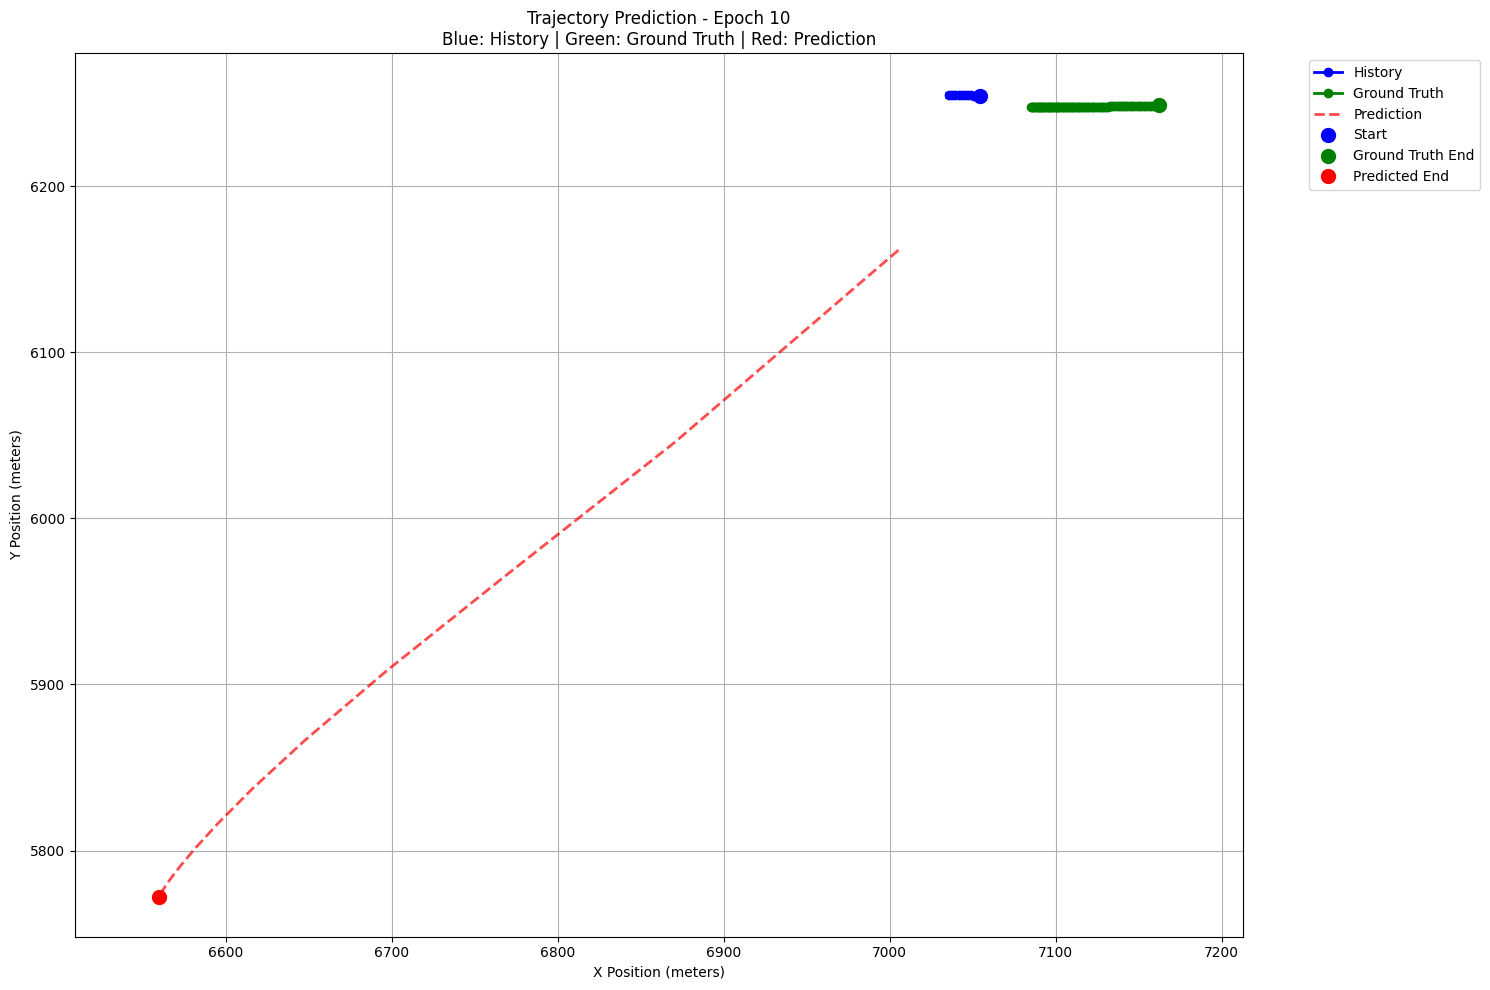


Epoch 20/200
Average loss: 0.542403

Prediction Statistics:
Average prediction error: 676.31 meters
Final position error: 767.04 meters
Trajectory length - History: 11 steps, Future: 80 steps


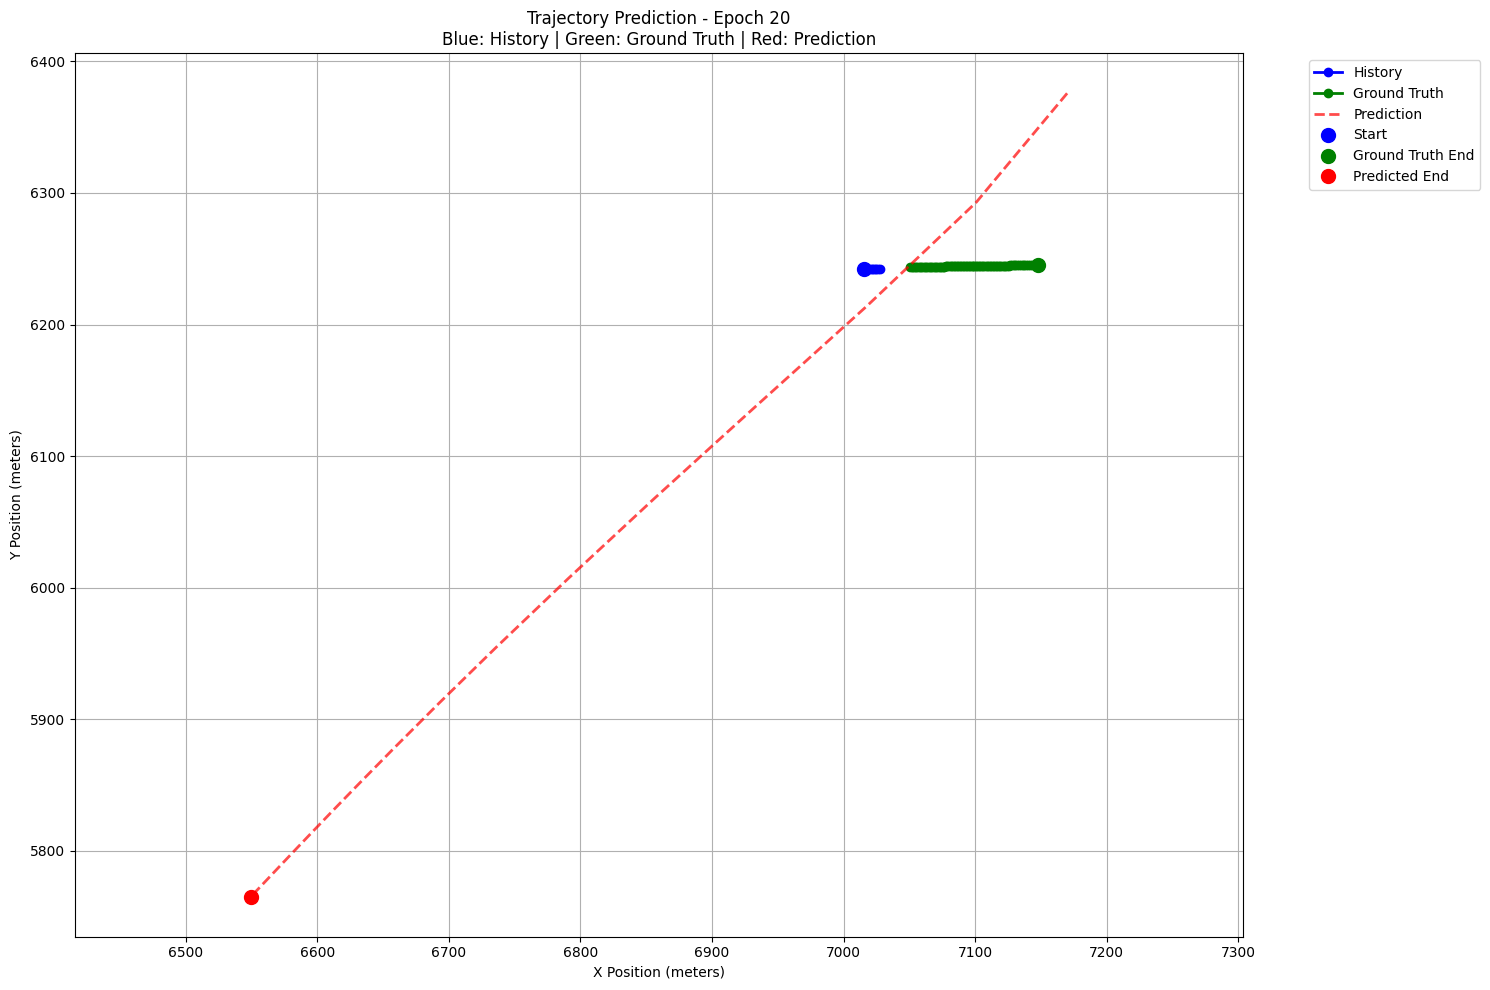


Epoch 30/200
Average loss: 0.532965

Prediction Statistics:
Average prediction error: 798.19 meters
Final position error: 1109.19 meters
Trajectory length - History: 11 steps, Future: 80 steps


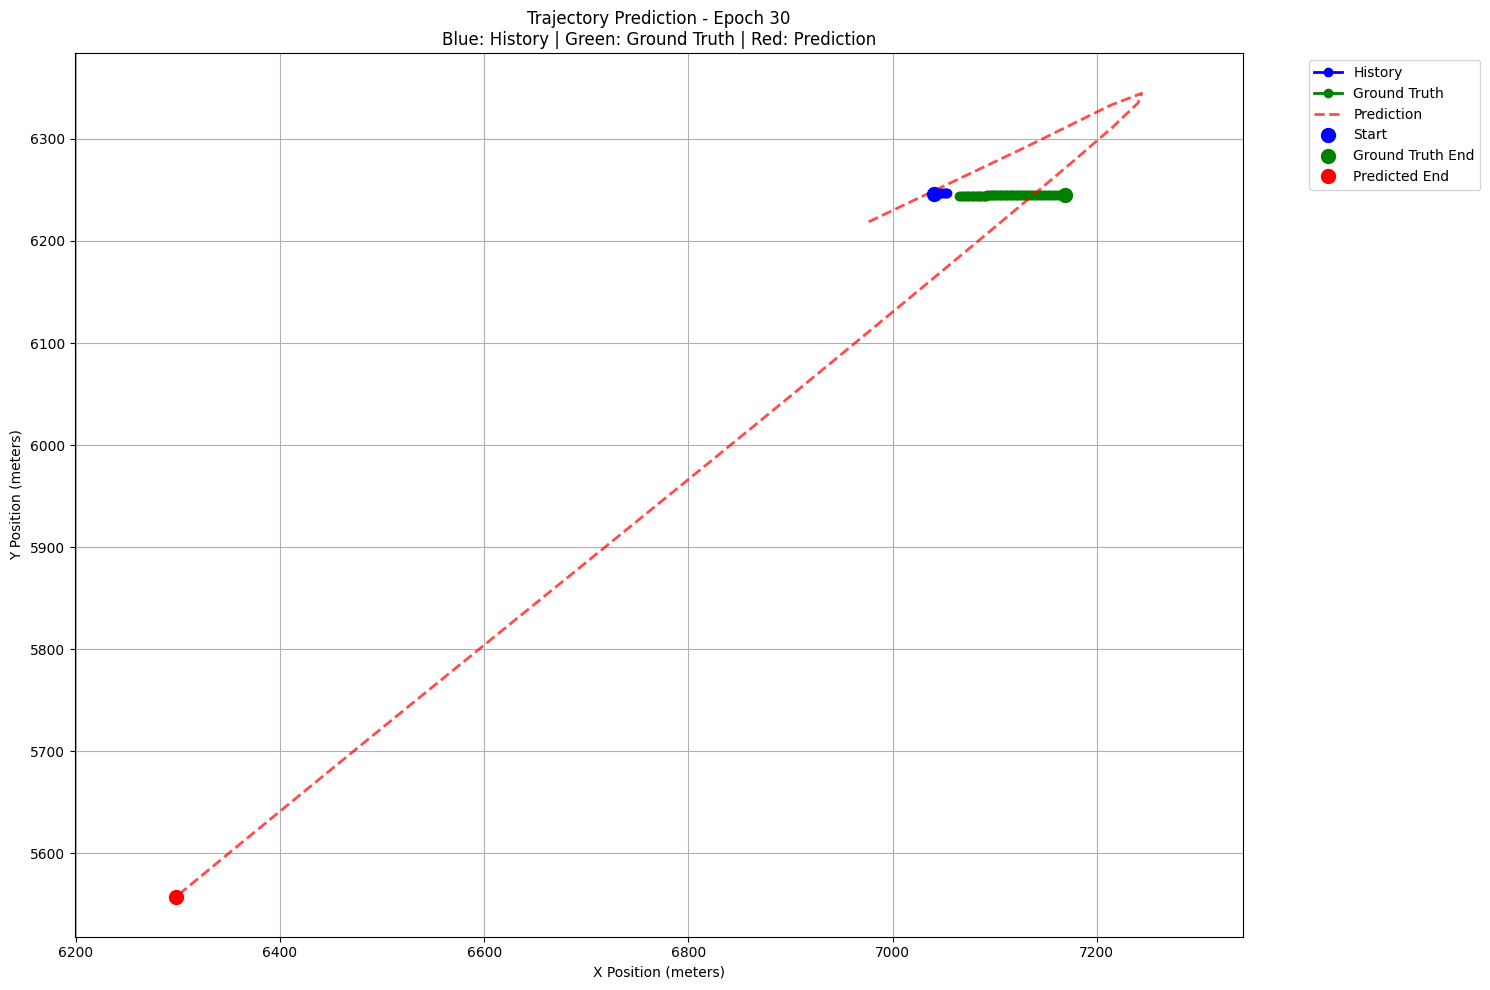


Epoch 40/200
Average loss: 0.541305

Prediction Statistics:
Average prediction error: 1303.14 meters
Final position error: 2304.31 meters
Trajectory length - History: 11 steps, Future: 80 steps


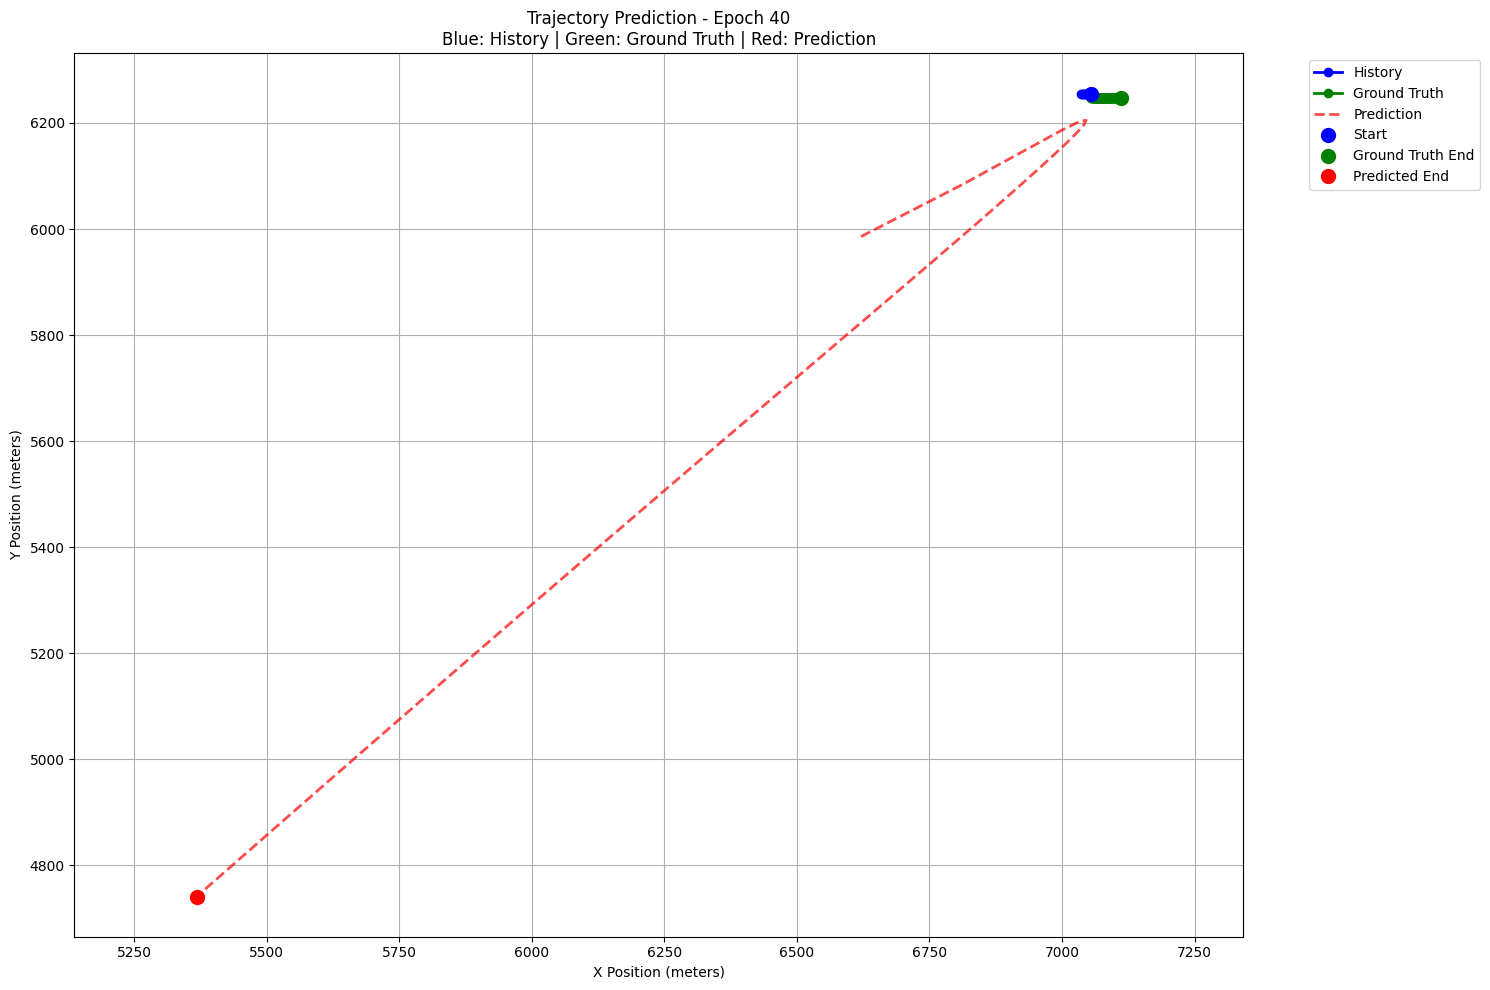


Epoch 50/200
Average loss: 0.537207

Prediction Statistics:
Average prediction error: 7568.93 meters
Final position error: 8779.32 meters
Trajectory length - History: 11 steps, Future: 80 steps


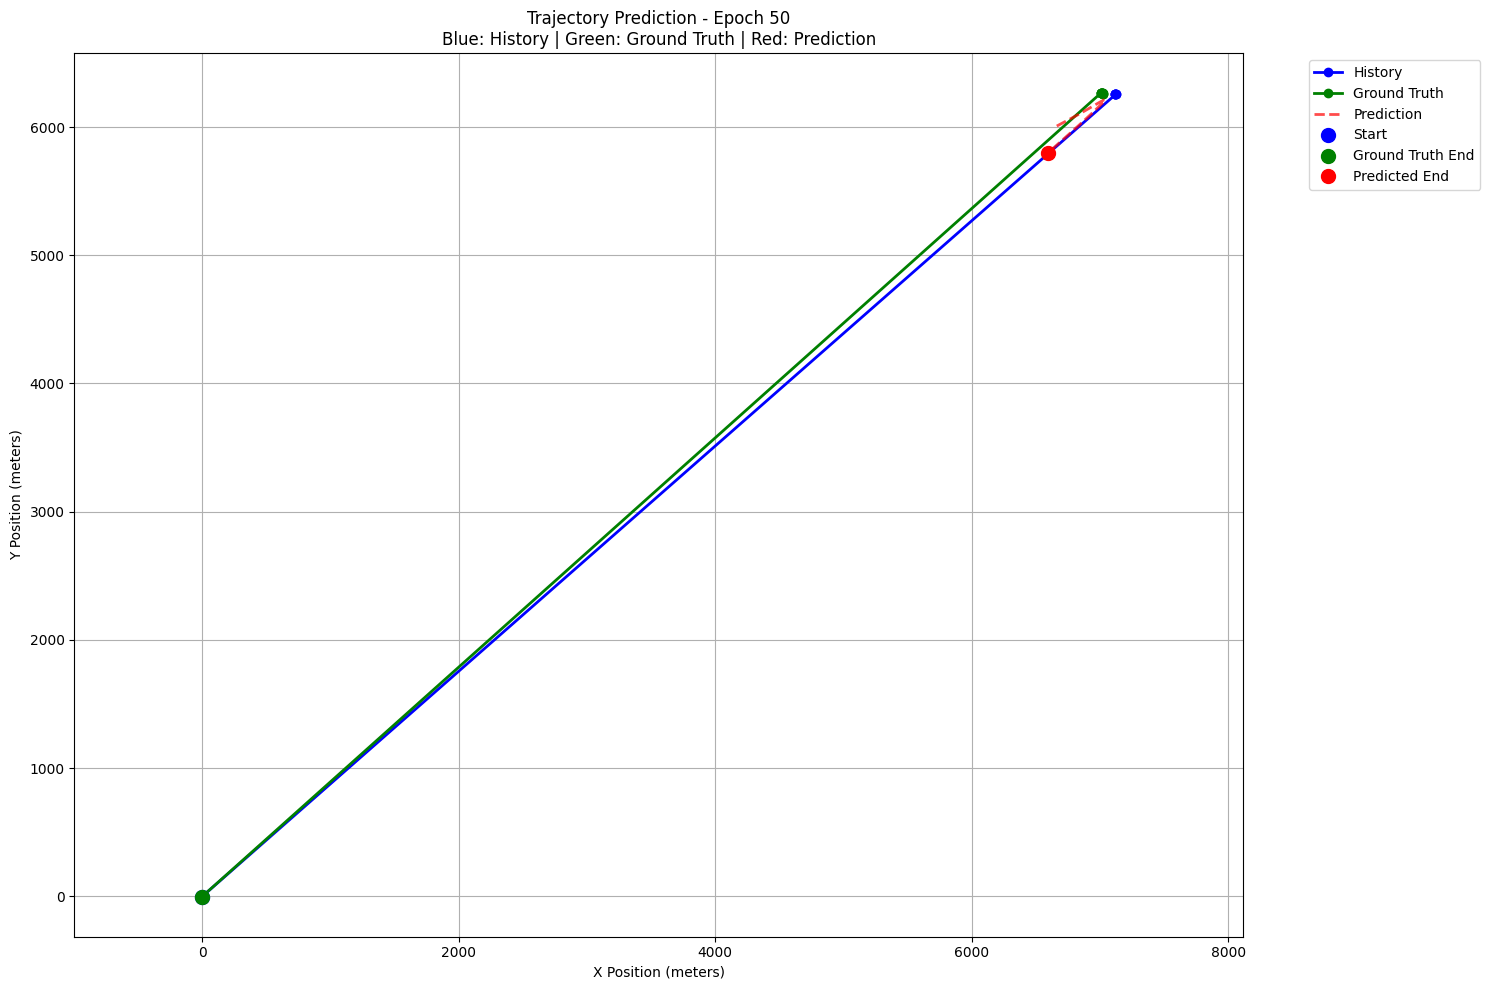


Epoch 60/200
Average loss: 0.531770

Prediction Statistics:
Average prediction error: 8027.67 meters
Final position error: 8486.04 meters
Trajectory length - History: 11 steps, Future: 80 steps


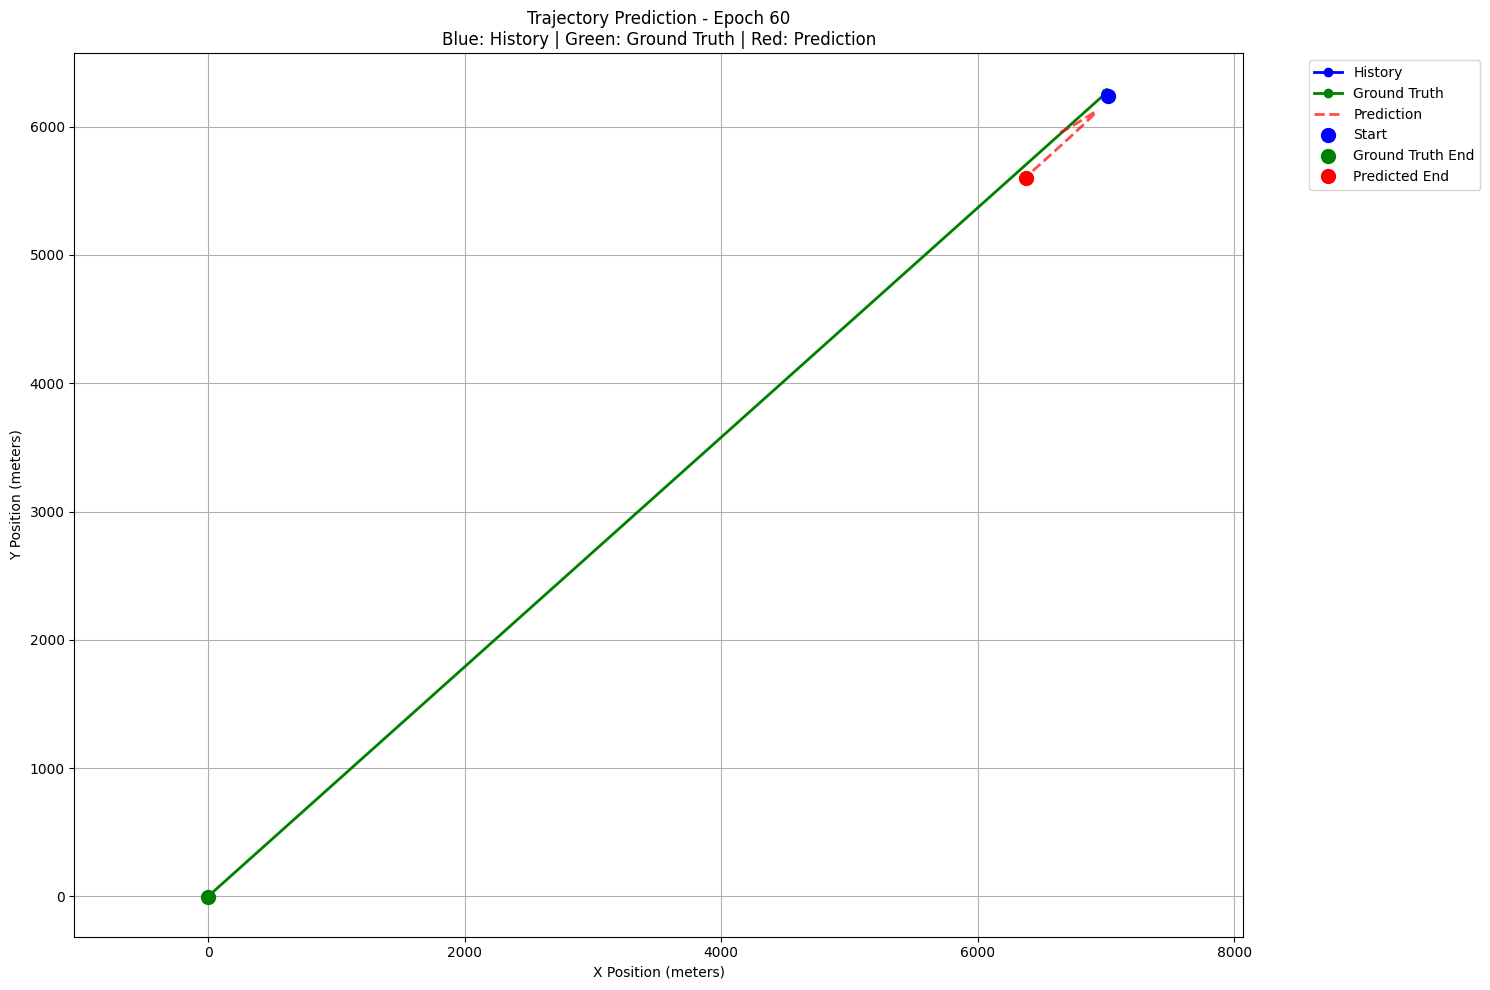


Epoch 70/200
Average loss: 0.527814

Prediction Statistics:
Average prediction error: 3528.52 meters
Final position error: 8006.29 meters
Trajectory length - History: 11 steps, Future: 80 steps


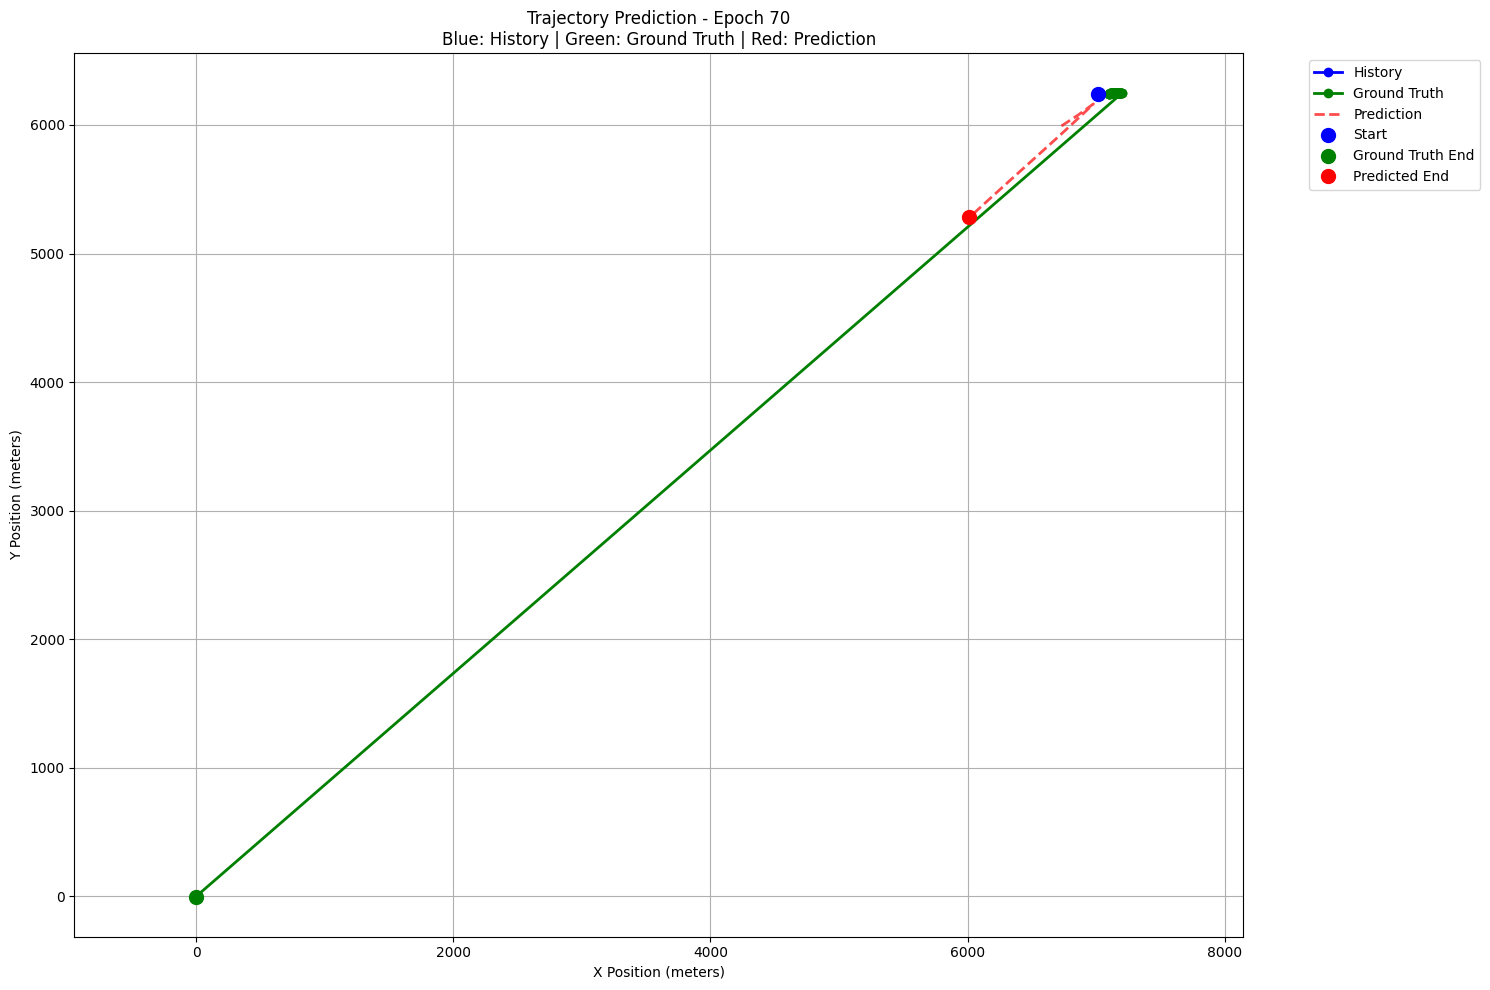


Epoch 80/200
Average loss: 0.519785

Prediction Statistics:
Average prediction error: 3356.13 meters
Final position error: 7827.51 meters
Trajectory length - History: 11 steps, Future: 80 steps


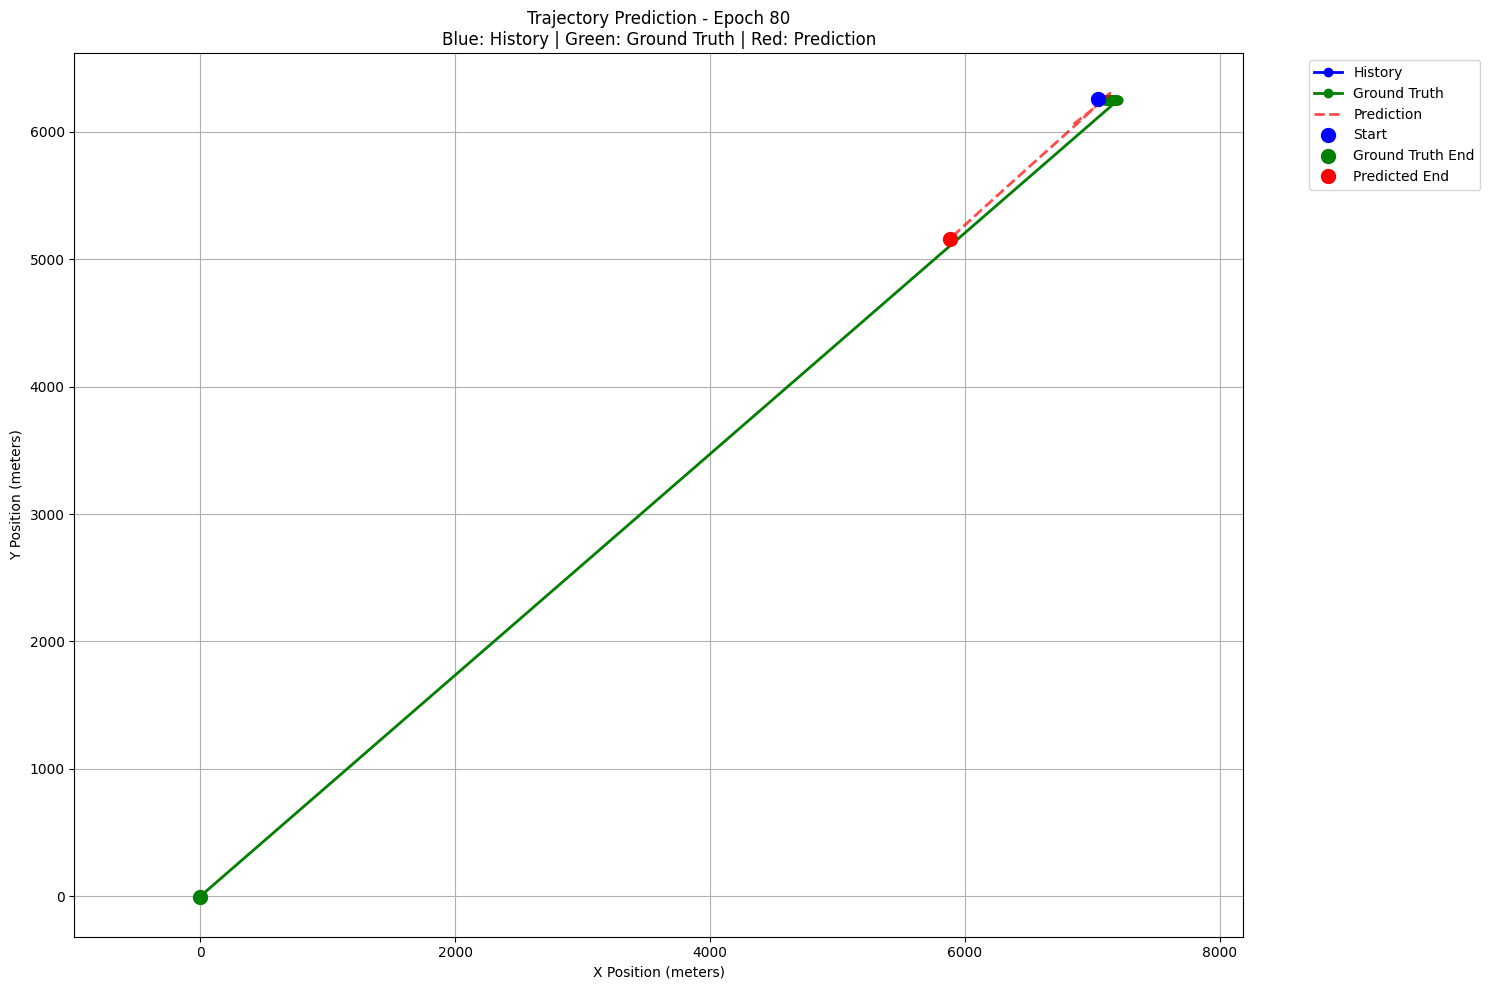


Epoch 90/200
Average loss: 0.510005

Prediction Statistics:
Average prediction error: 1001.89 meters
Final position error: 2919.37 meters
Trajectory length - History: 11 steps, Future: 80 steps


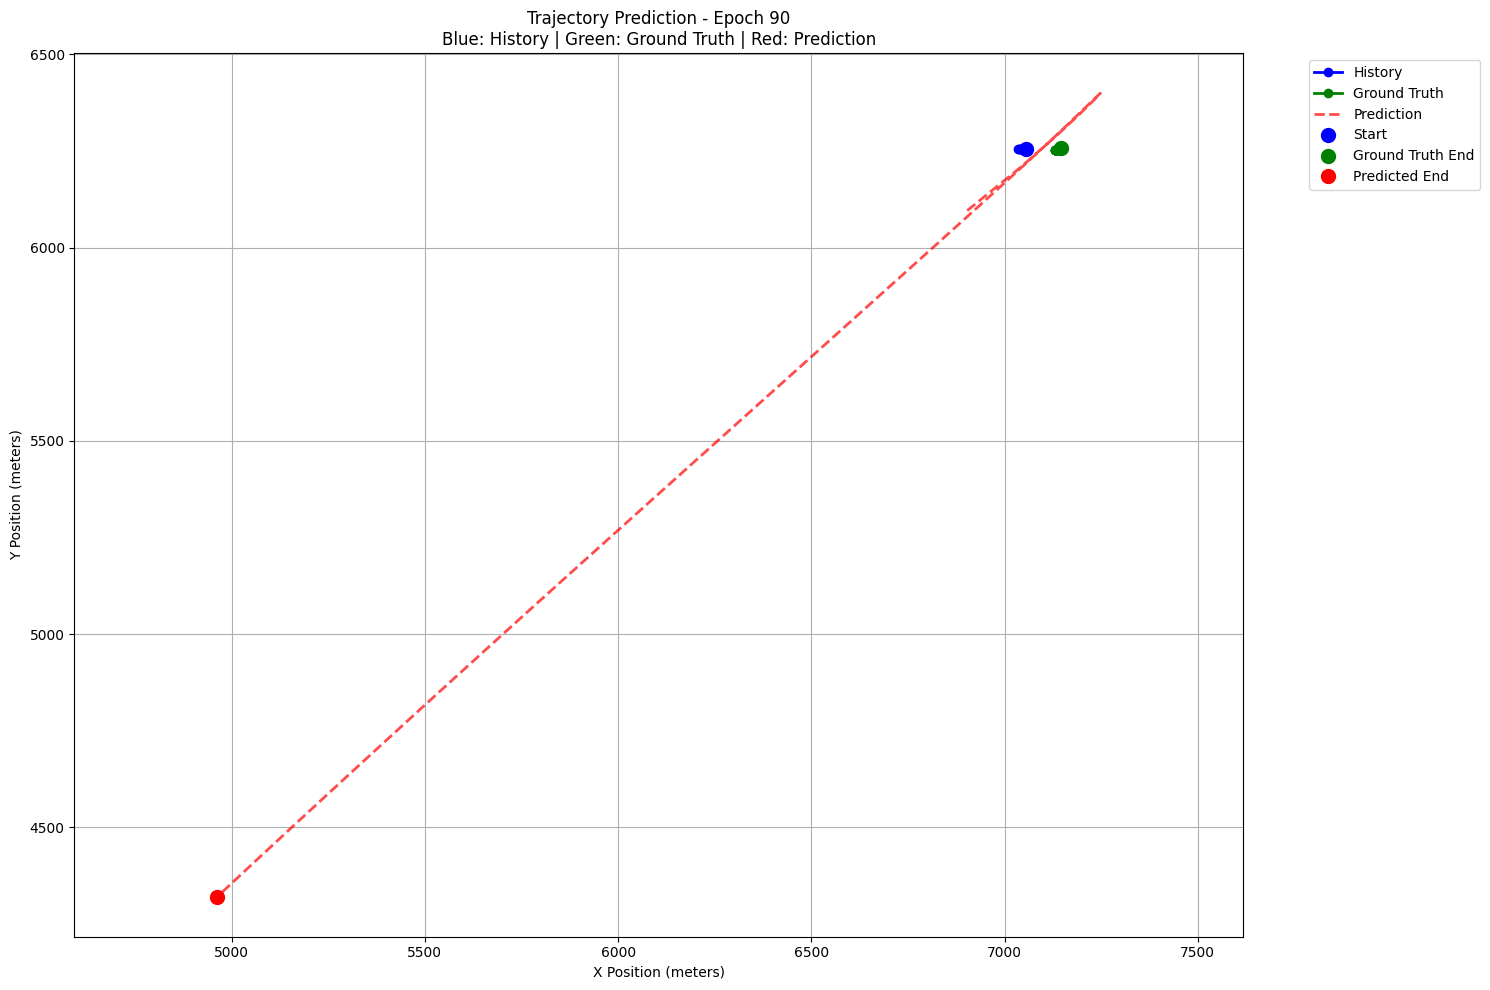


Epoch 100/200
Average loss: 0.508052

Prediction Statistics:
Average prediction error: 701.49 meters
Final position error: 2637.96 meters
Trajectory length - History: 11 steps, Future: 80 steps


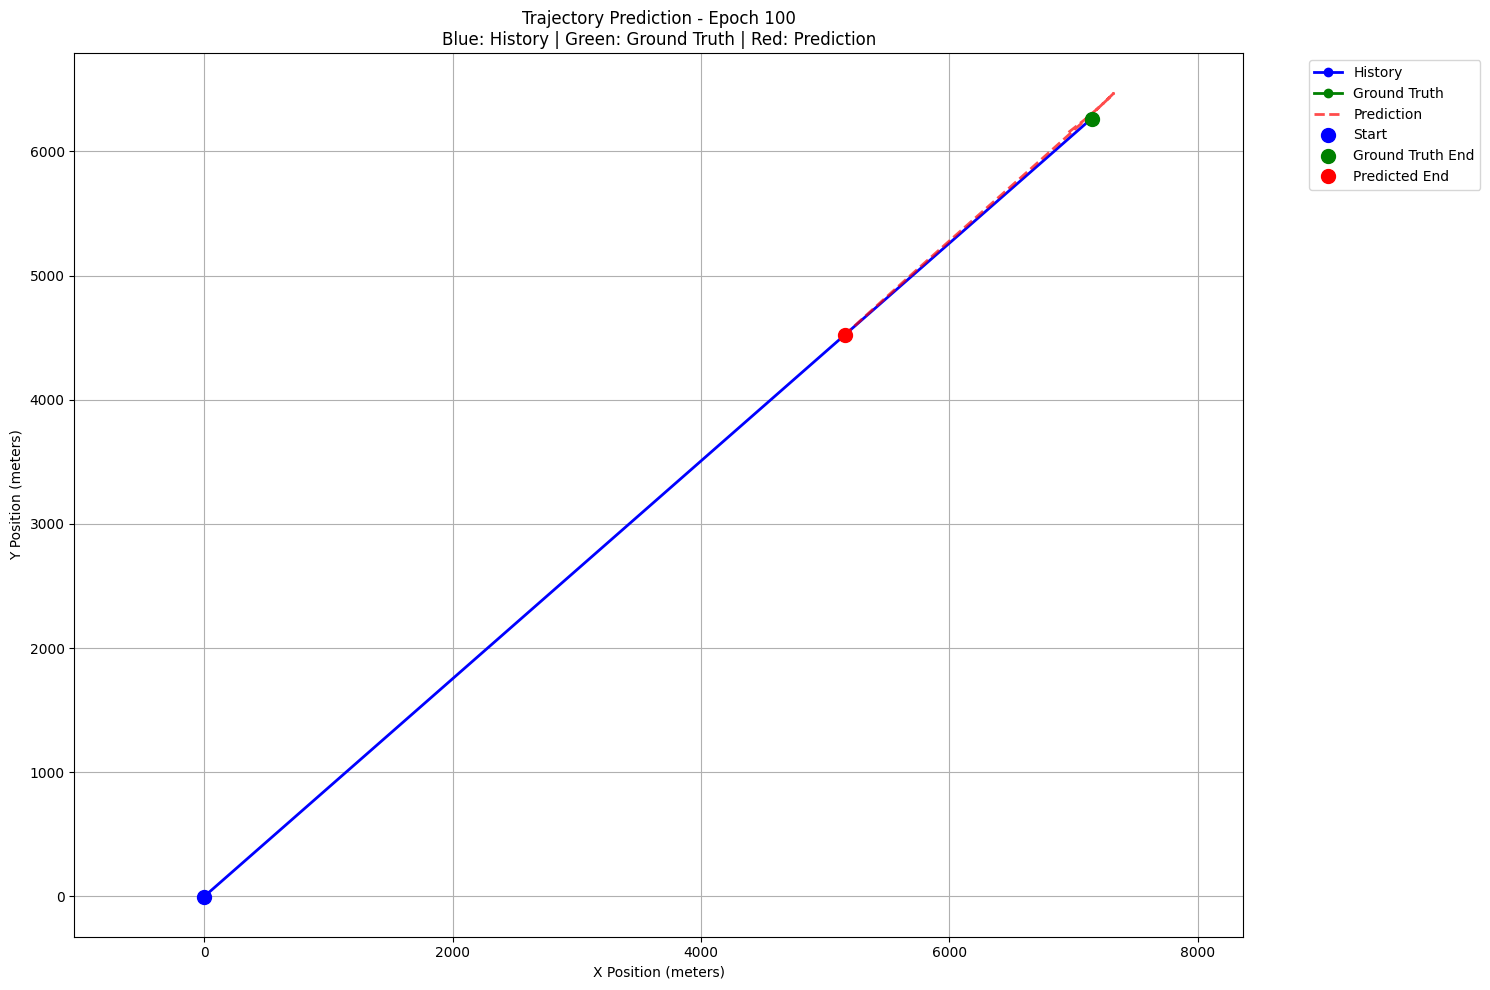


Epoch 110/200
Average loss: 0.496183

Prediction Statistics:
Average prediction error: 730.40 meters
Final position error: 2498.32 meters
Trajectory length - History: 11 steps, Future: 80 steps


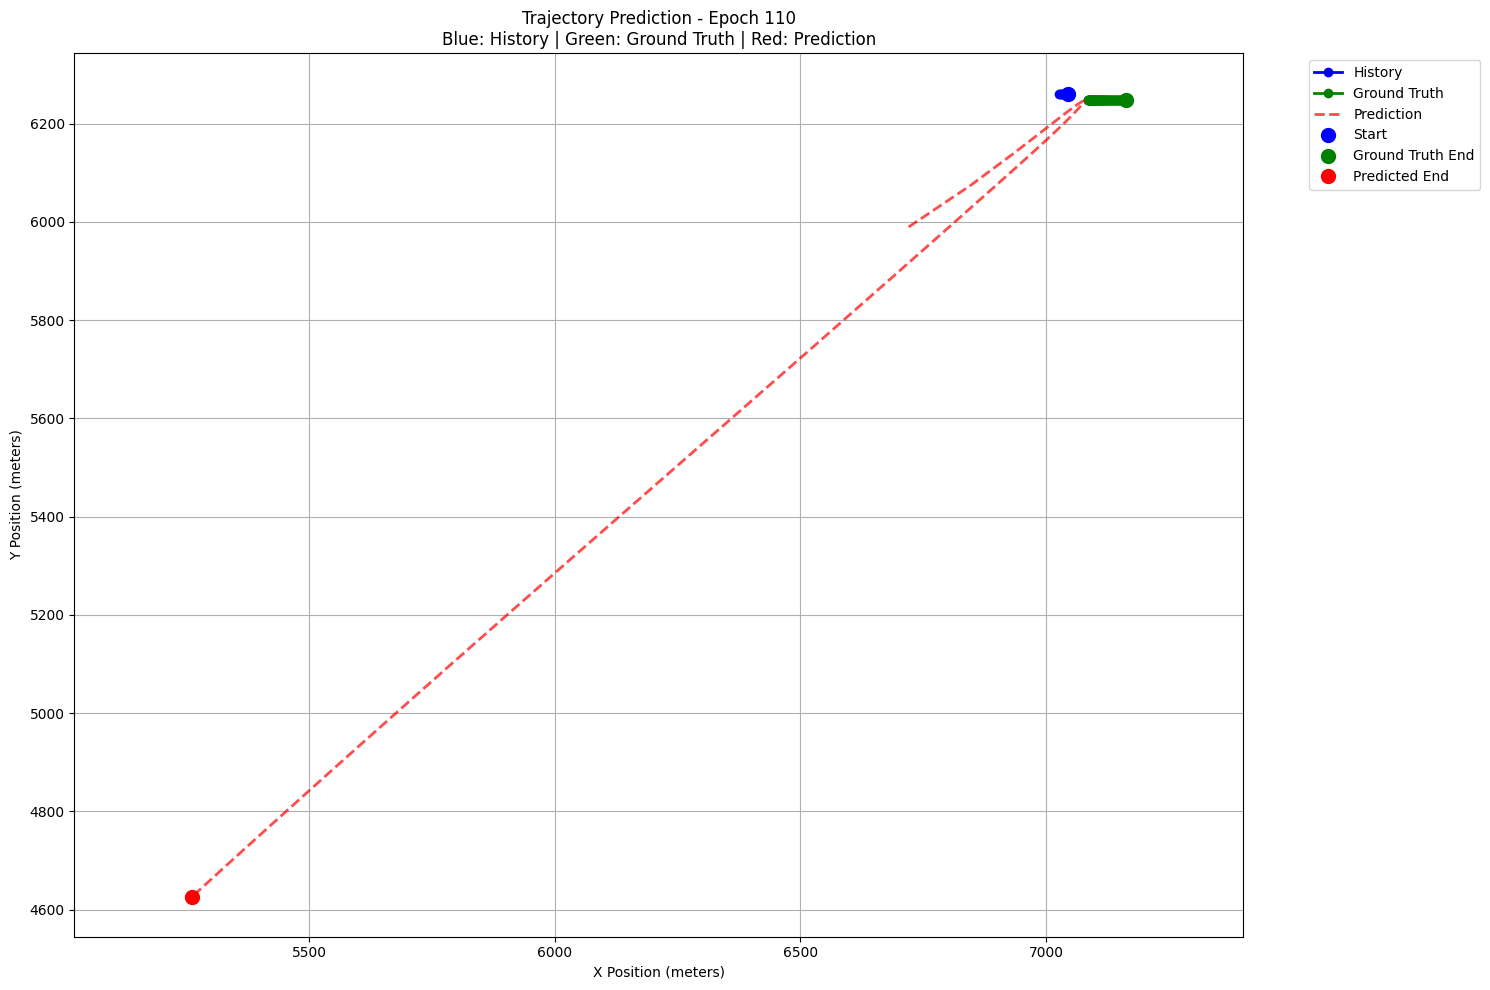


Epoch 120/200
Average loss: 0.497055

Prediction Statistics:
Average prediction error: 3586.80 meters
Final position error: 6821.96 meters
Trajectory length - History: 11 steps, Future: 80 steps


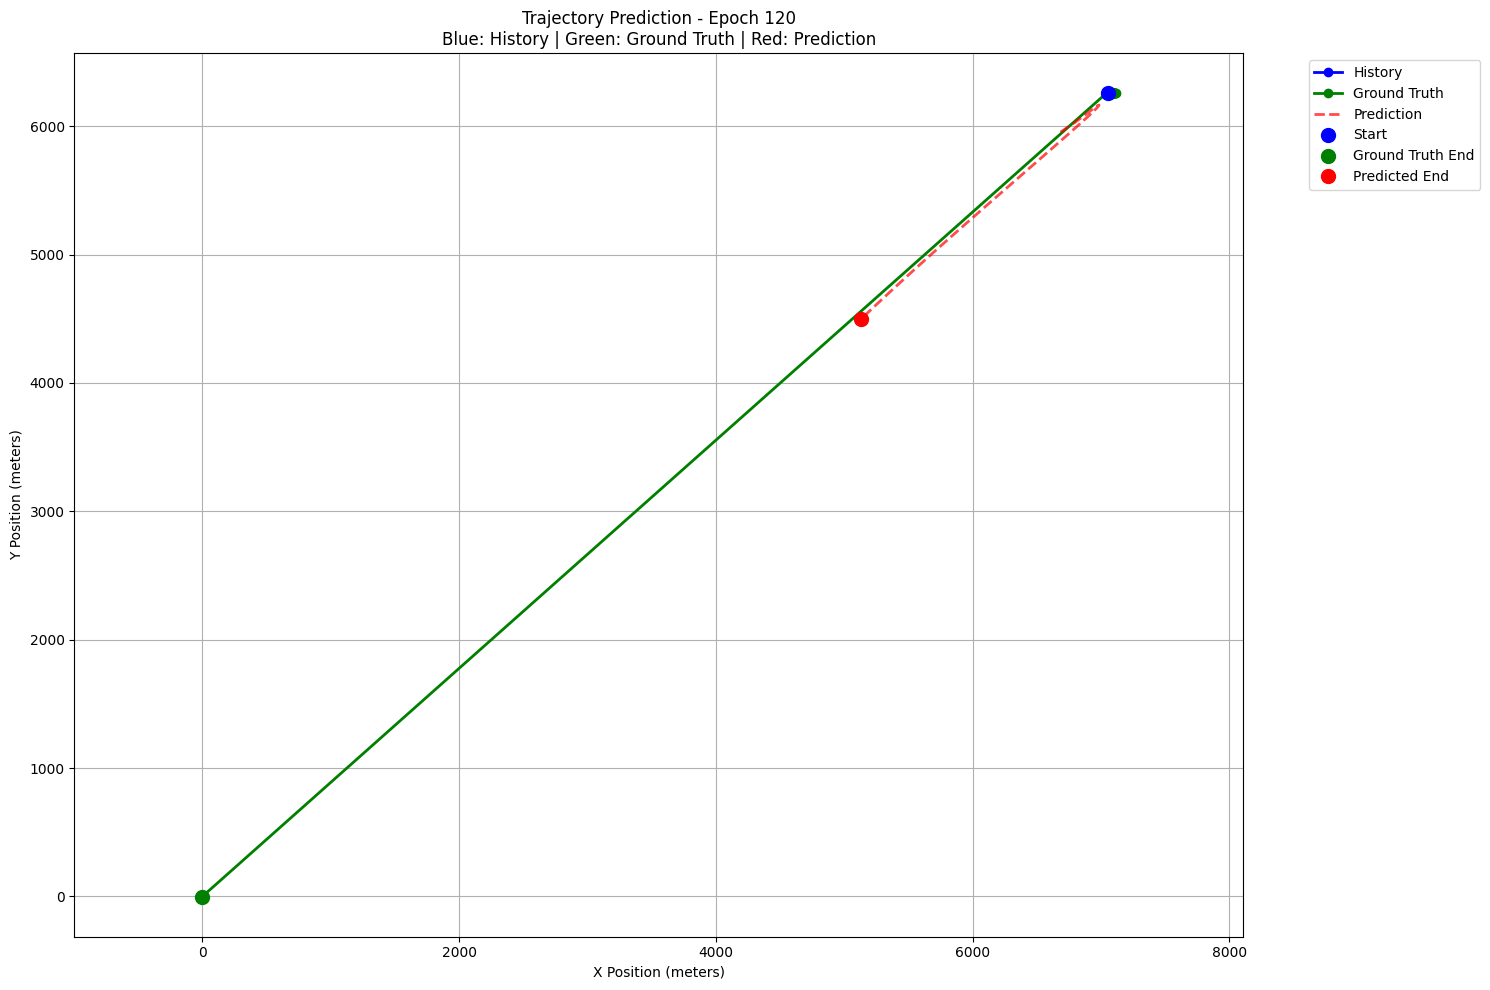


Epoch 130/200
Average loss: 0.509632

Prediction Statistics:
Average prediction error: 1155.48 meters
Final position error: 2913.90 meters
Trajectory length - History: 11 steps, Future: 80 steps


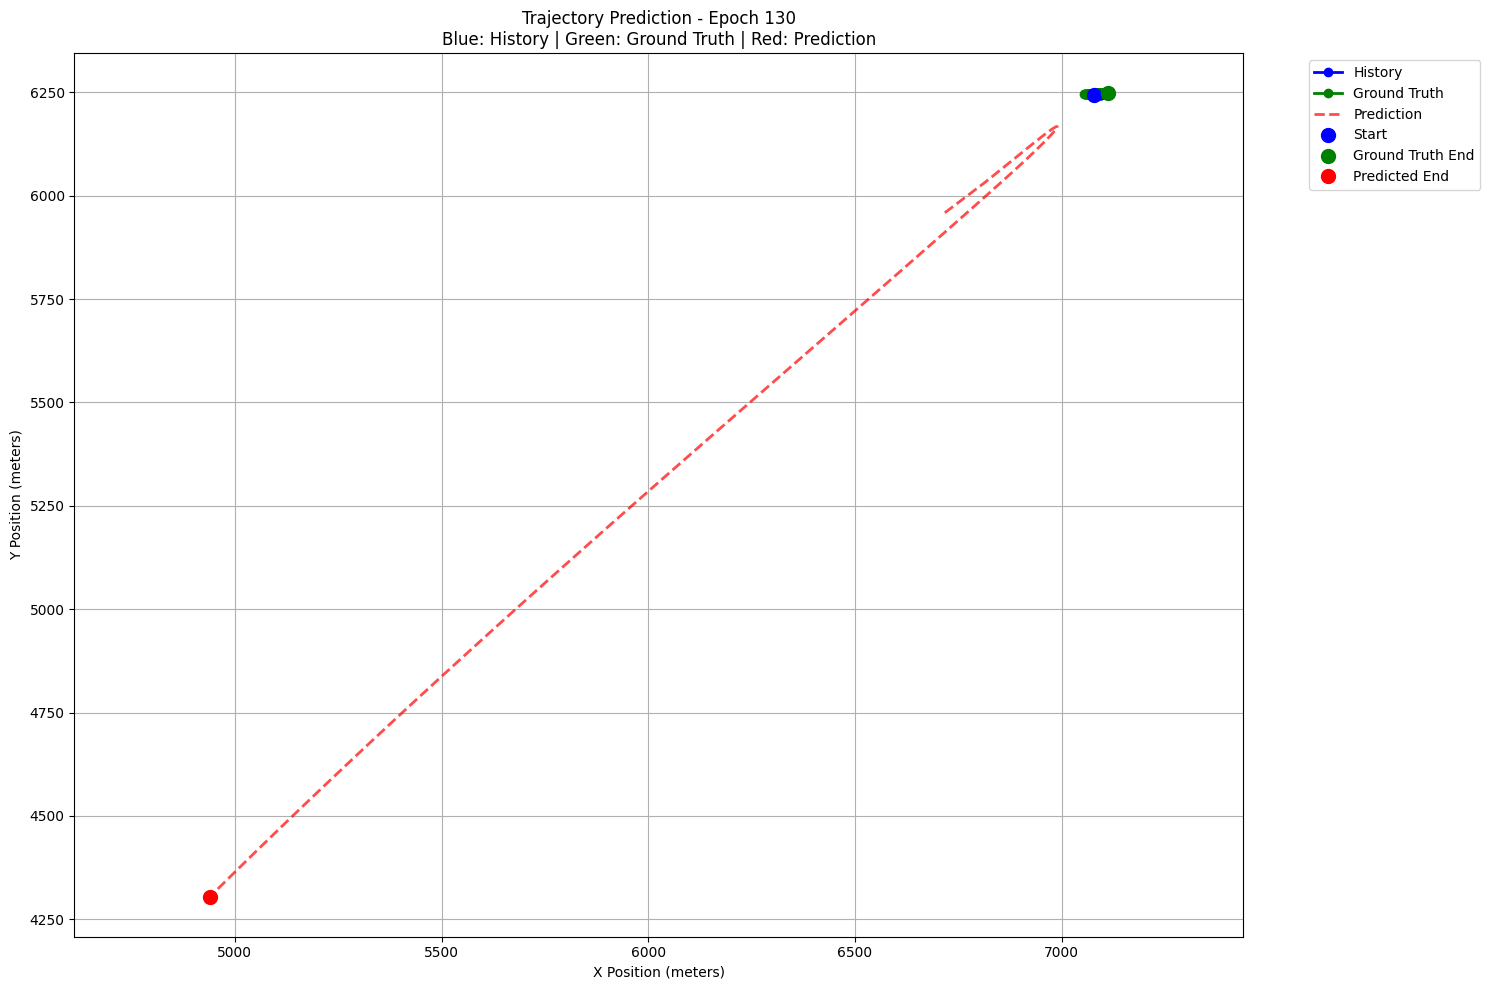


Epoch 140/200
Average loss: 0.499372

Prediction Statistics:
Average prediction error: 1068.67 meters
Final position error: 2871.59 meters
Trajectory length - History: 11 steps, Future: 80 steps


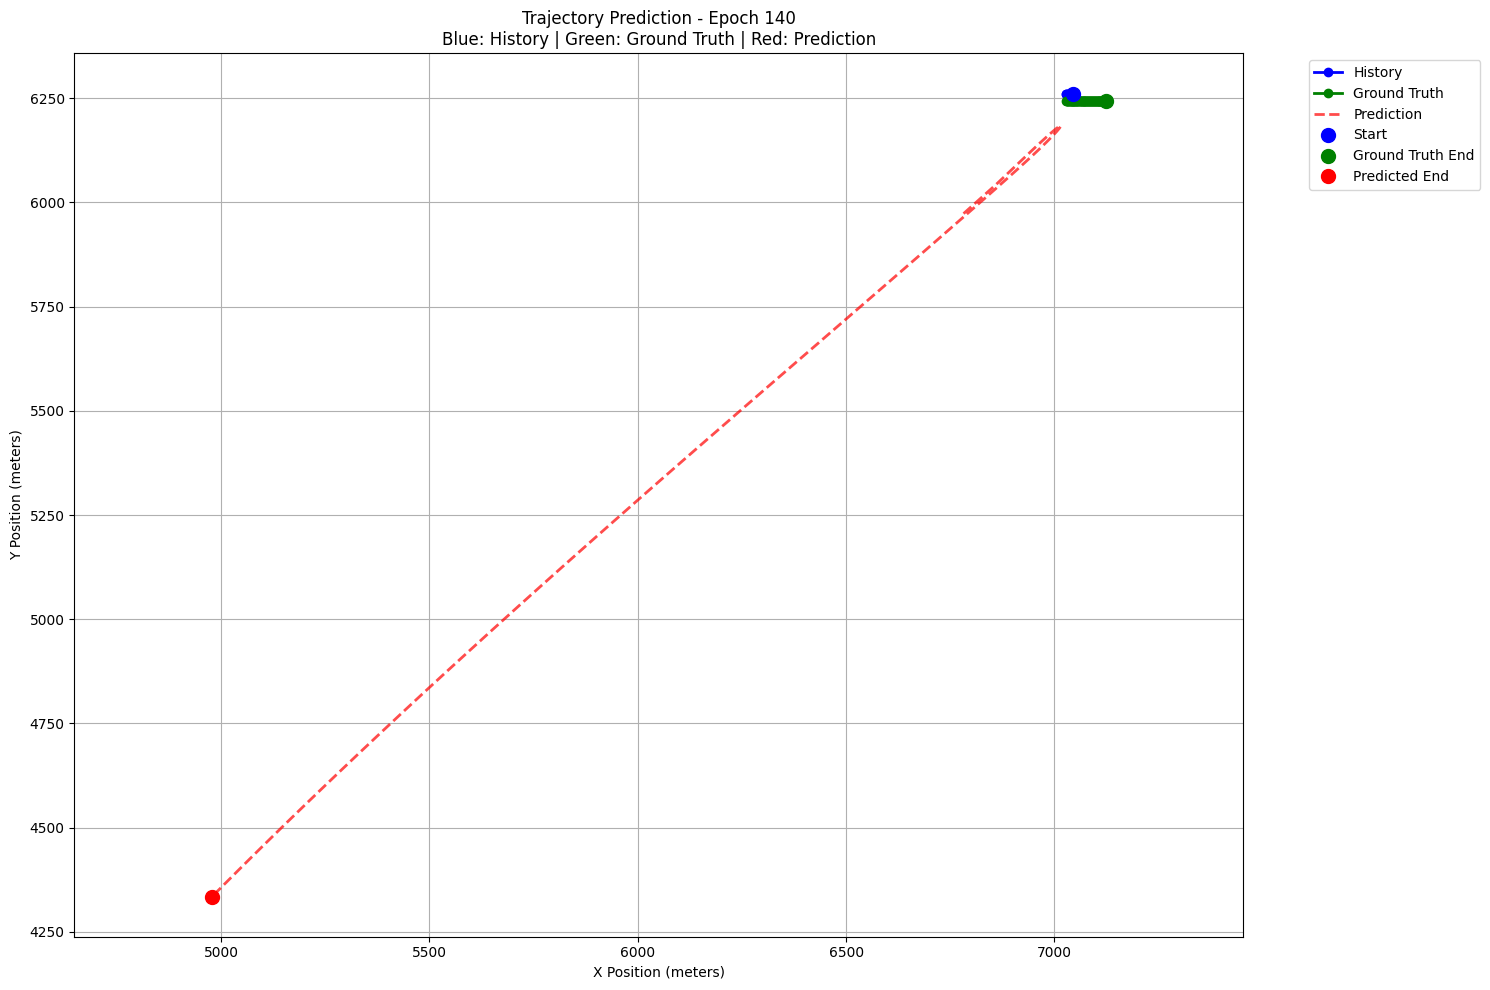


Epoch 150/200
Average loss: 0.482977

Prediction Statistics:
Average prediction error: 736.23 meters
Final position error: 2565.66 meters
Trajectory length - History: 11 steps, Future: 80 steps


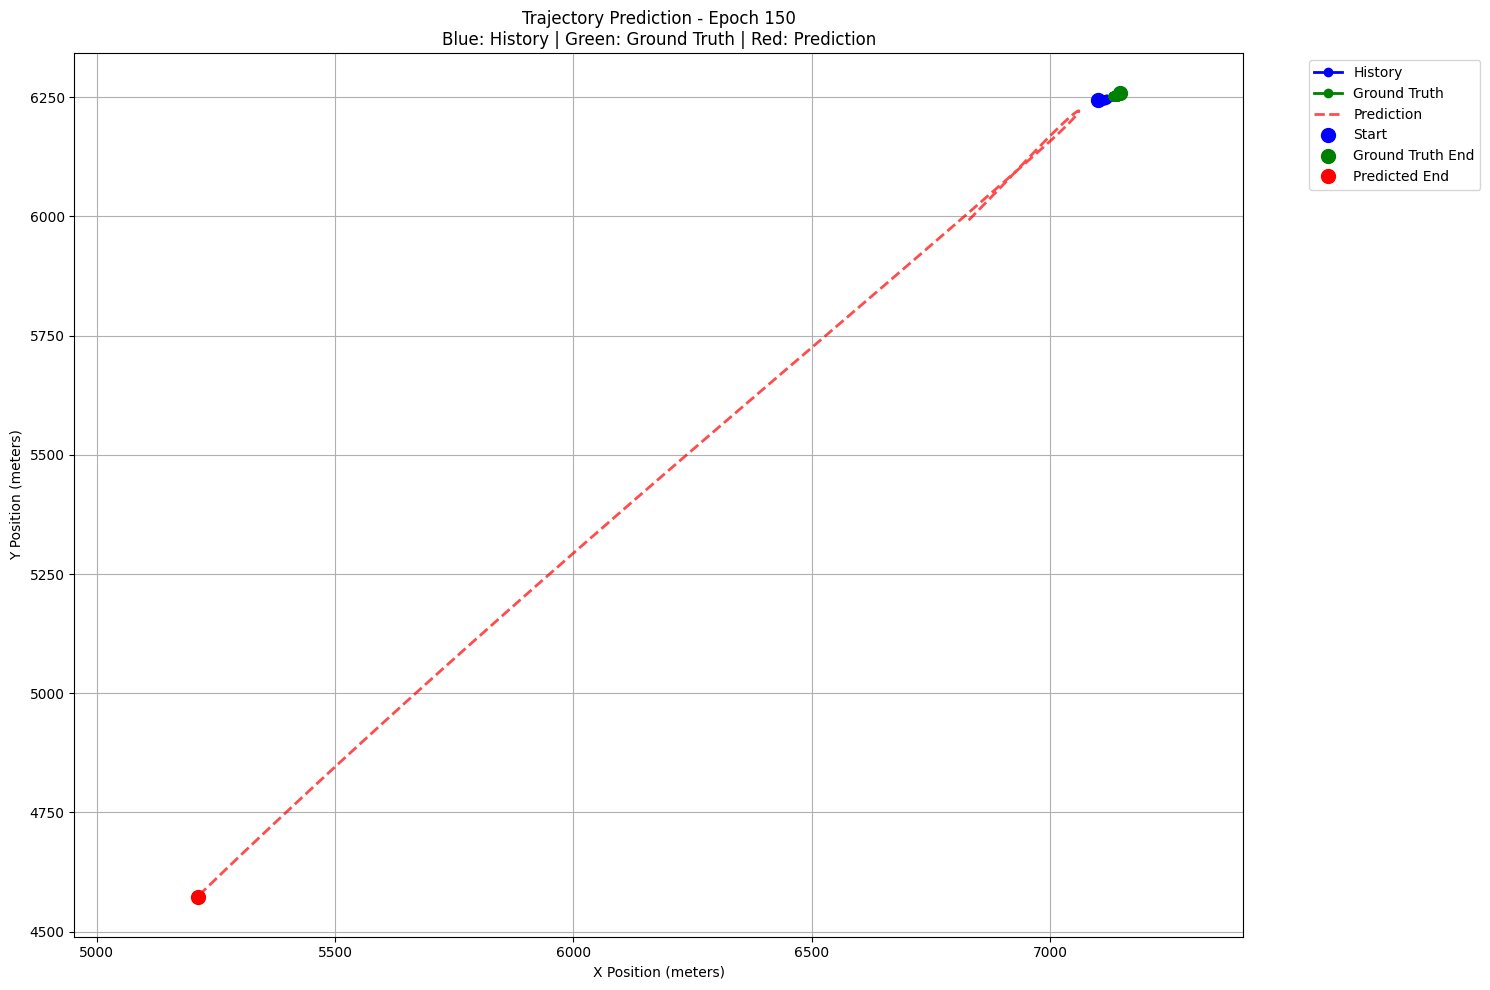


Epoch 160/200
Average loss: 0.482903

Prediction Statistics:
Average prediction error: 989.24 meters
Final position error: 2325.66 meters
Trajectory length - History: 11 steps, Future: 80 steps


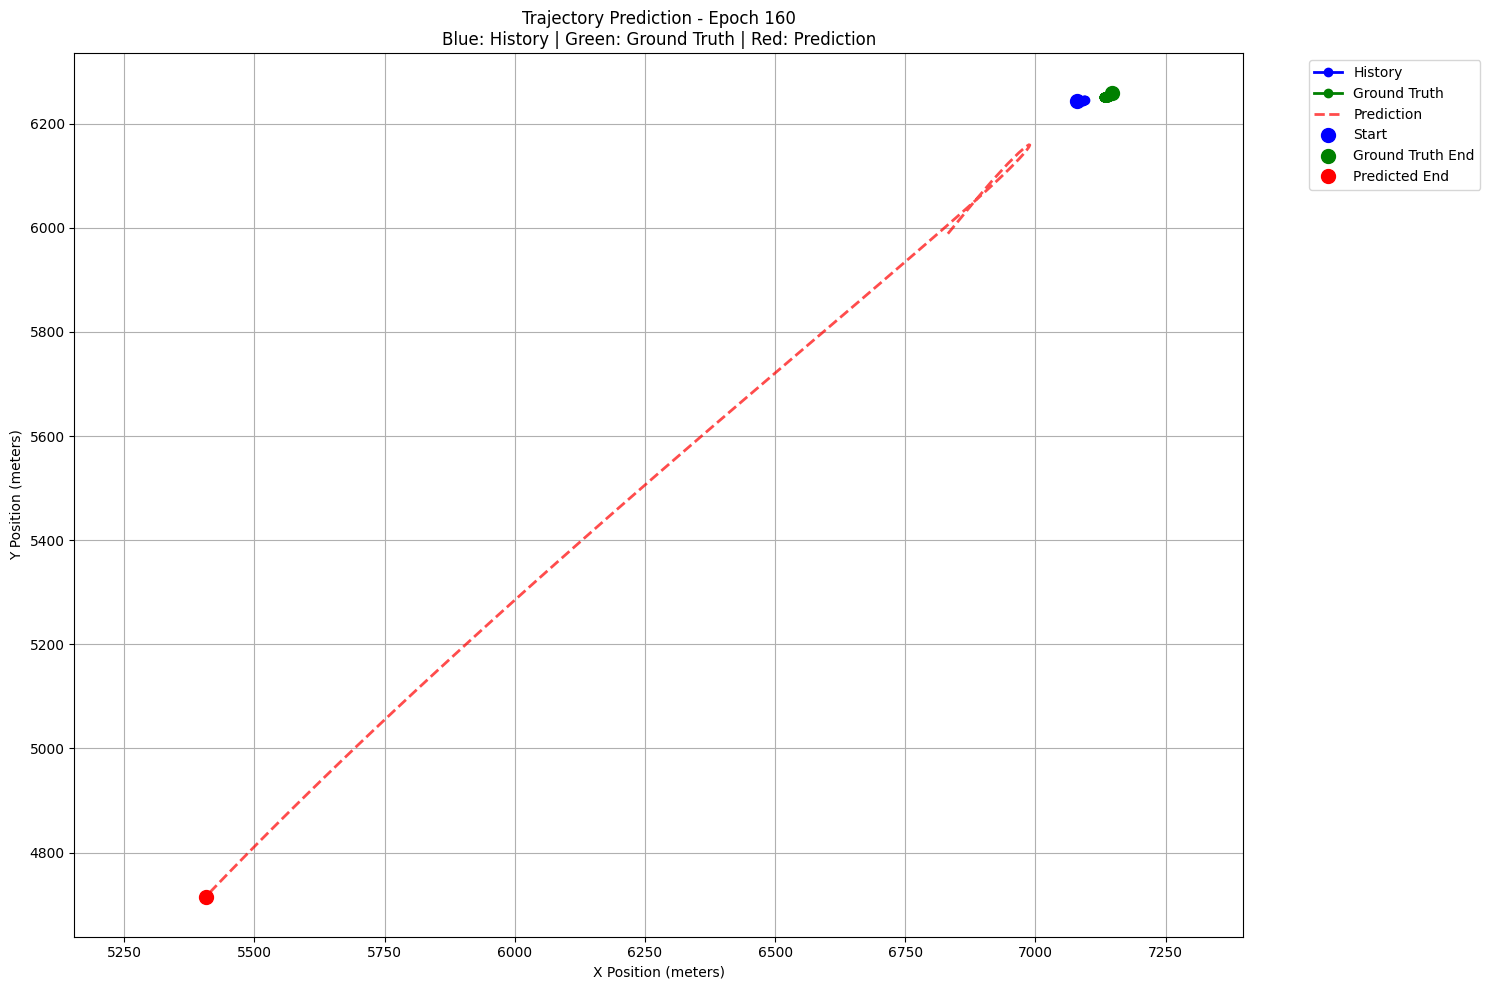


Epoch 170/200
Average loss: 0.499263

Prediction Statistics:
Average prediction error: 980.51 meters
Final position error: 2631.09 meters
Trajectory length - History: 11 steps, Future: 80 steps


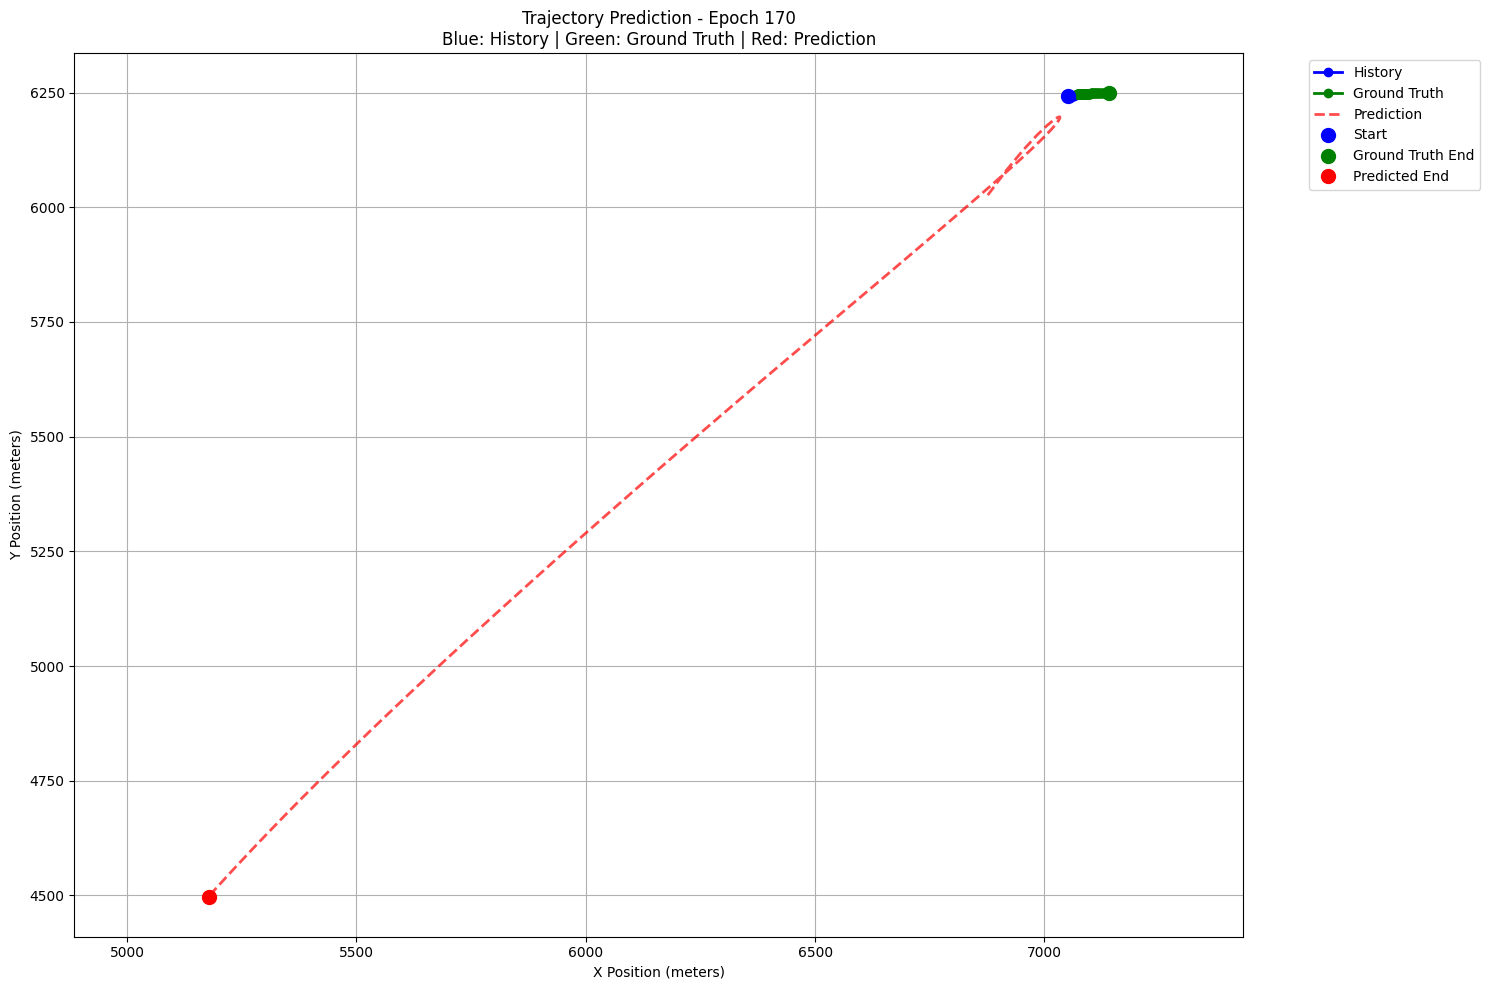


Epoch 180/200
Average loss: 0.473527

Prediction Statistics:
Average prediction error: 848.95 meters
Final position error: 2821.40 meters
Trajectory length - History: 11 steps, Future: 80 steps


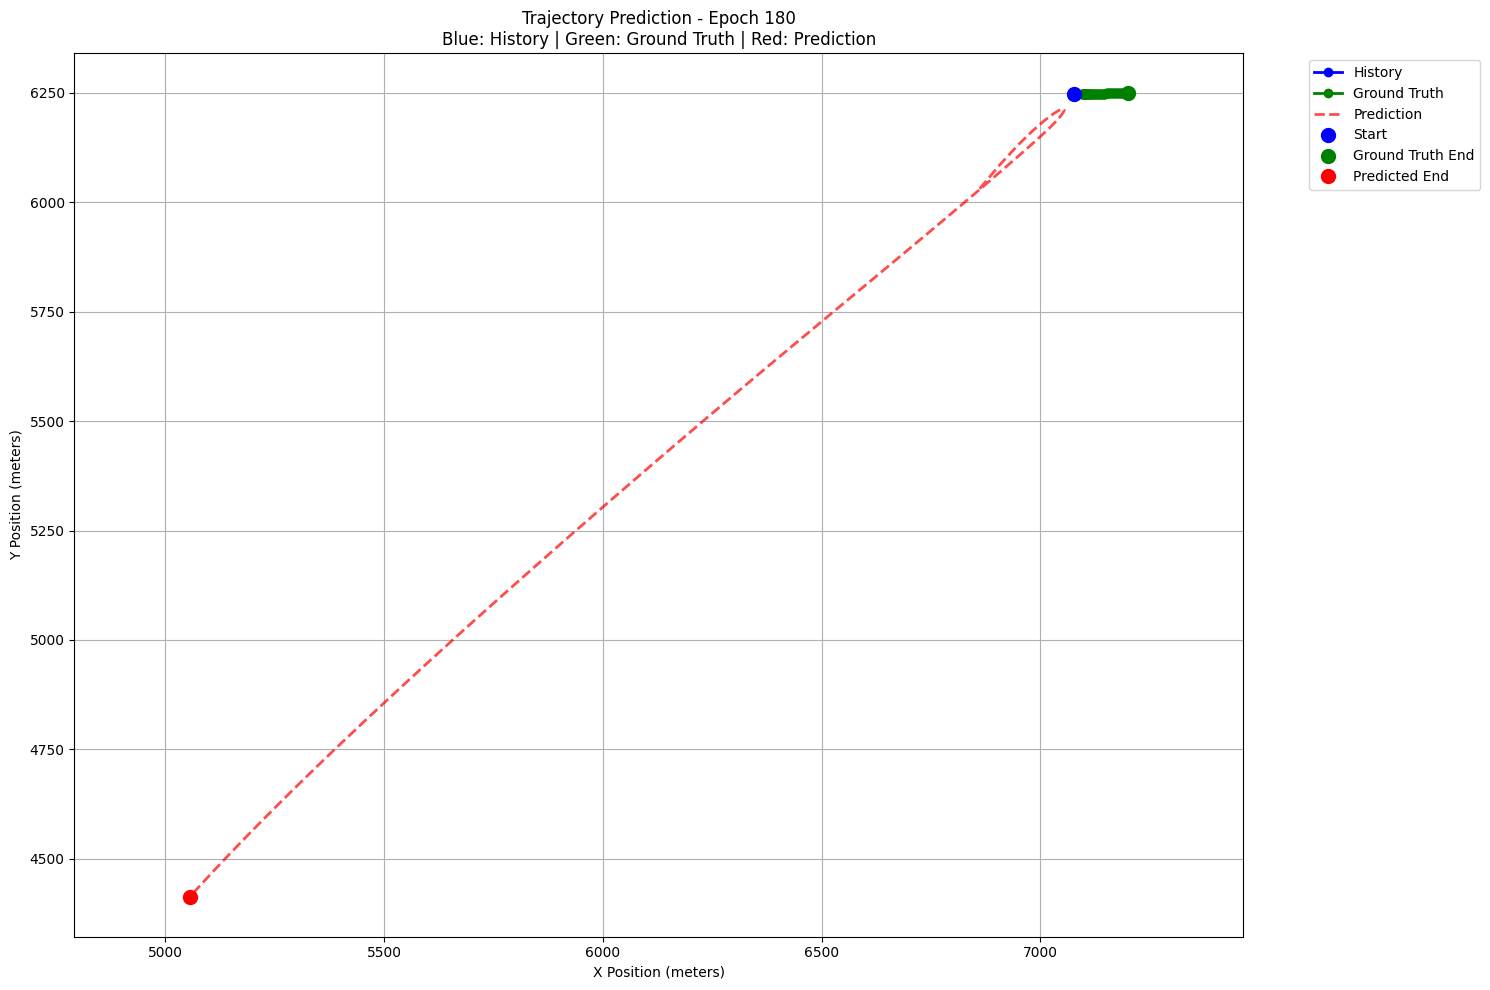


Epoch 190/200
Average loss: 0.496150

Prediction Statistics:
Average prediction error: 1085.11 meters
Final position error: 2617.64 meters
Trajectory length - History: 11 steps, Future: 80 steps


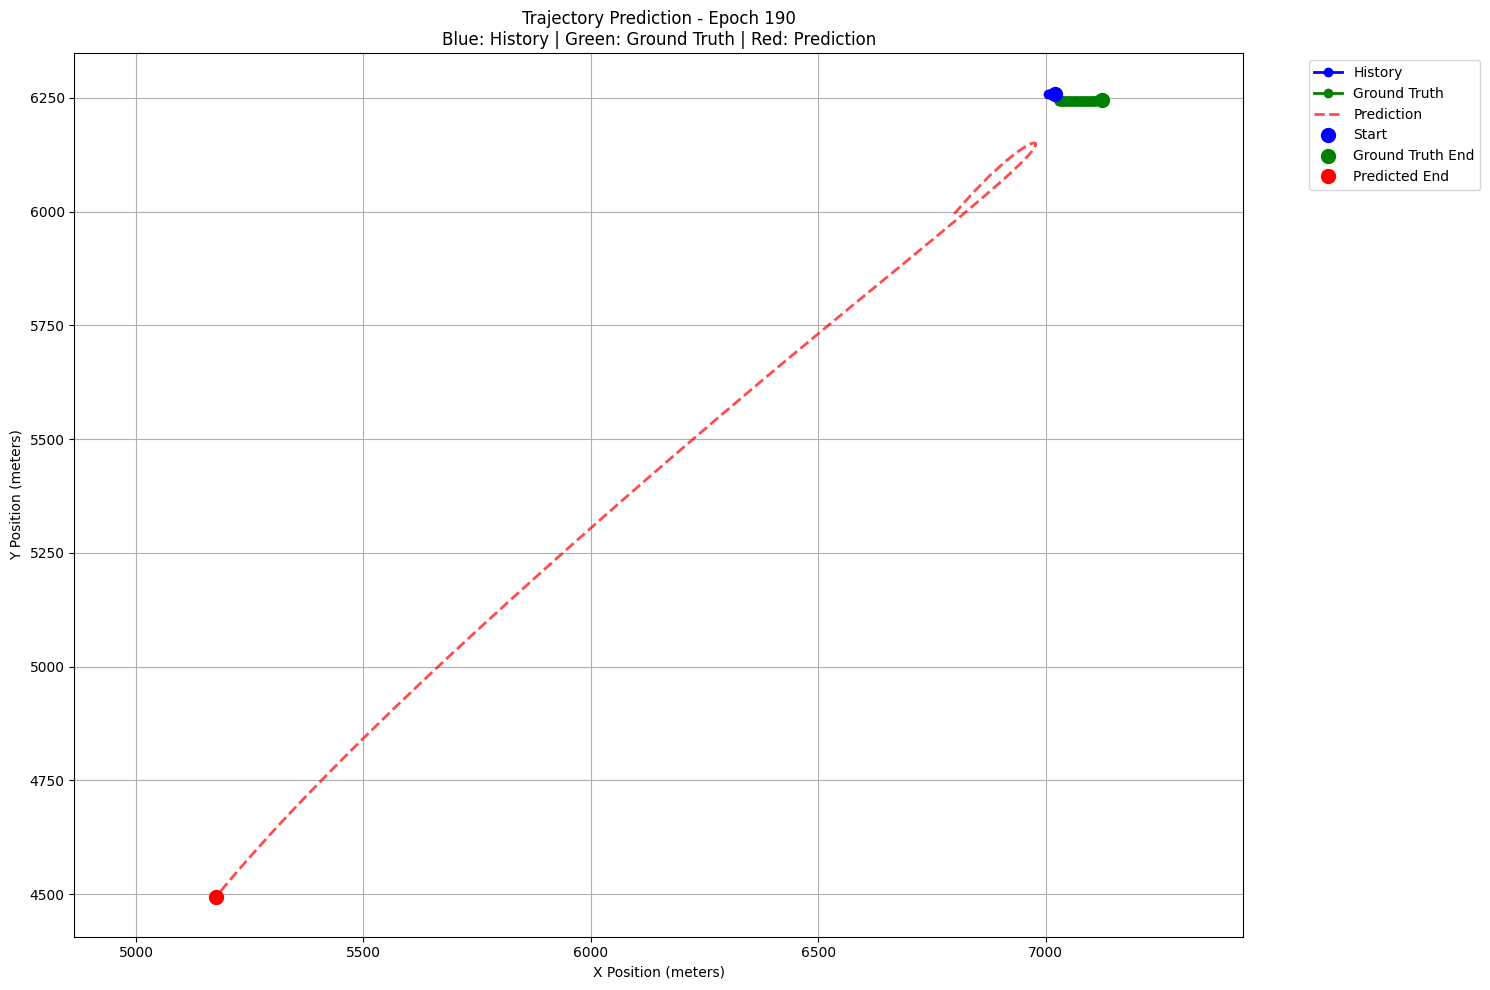


Epoch 200/200
Average loss: 0.506293

Prediction Statistics:
Average prediction error: 3122.08 meters
Final position error: 7188.19 meters
Trajectory length - History: 11 steps, Future: 80 steps


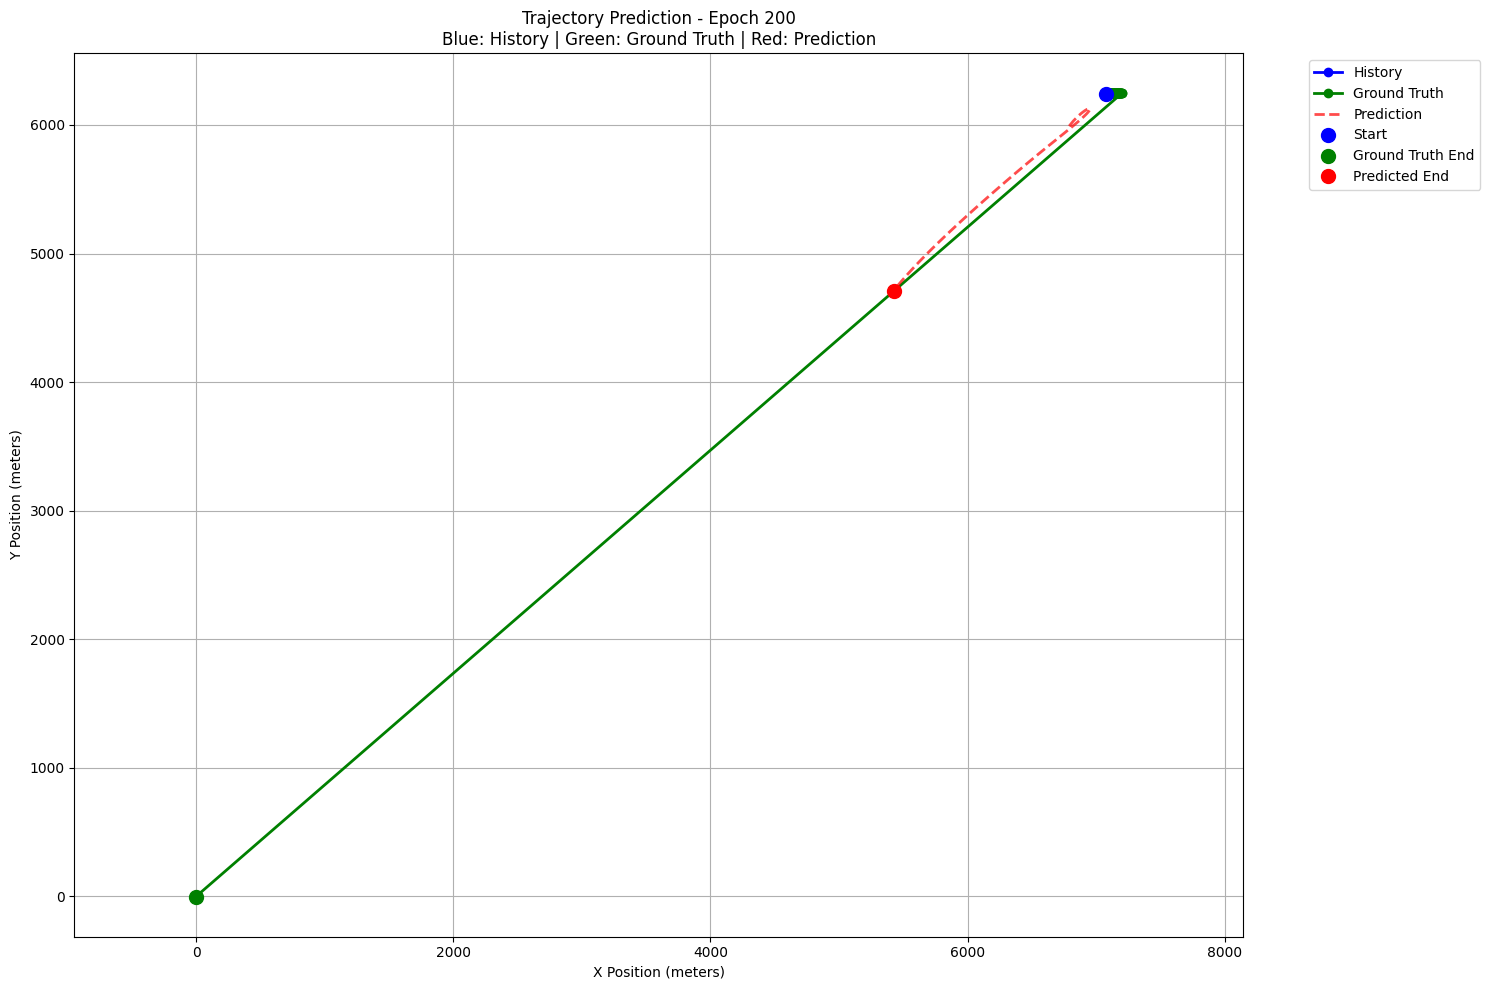


Training completed!


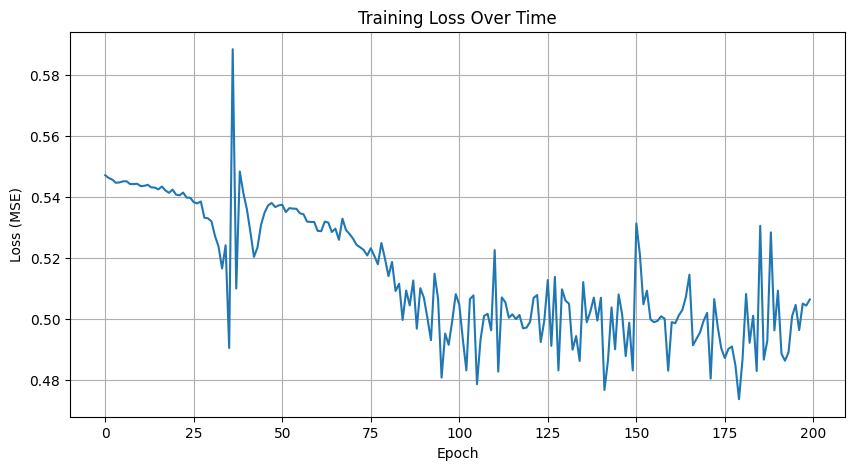

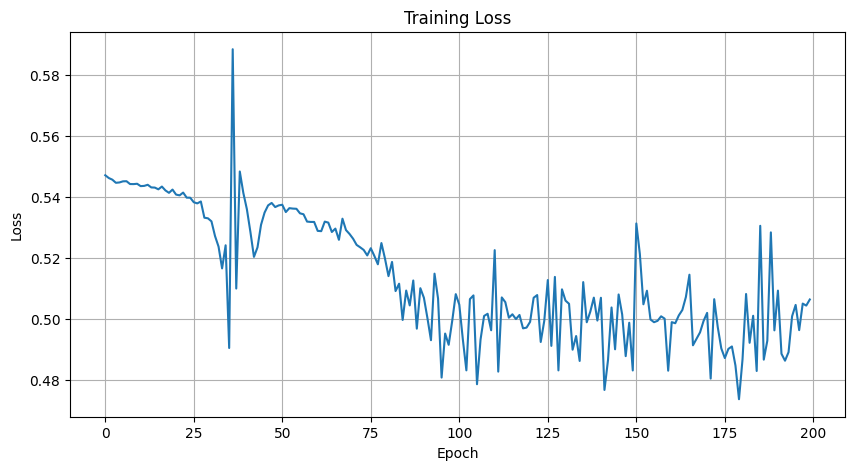

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from trajectory_dataset import TrajectoryDataset
from TrajectoryPredictorGRU import TrajectoryPredictorGRU
    
def visualize_prediction(history, future, prediction, epoch, dataset):
    """
    Visualize the model's prediction with enhanced styling.
    
    Args:
        history: tensor of shape [1, 11, 2] - normalized historical trajectory
        future: tensor of shape [1, 80, 2] - normalized ground truth future trajectory
        prediction: tensor of shape [1, 80, 2] - normalized predicted future trajectory
        epoch: current training epoch
        dataset: dataset object for denormalization
    """
    # Denormalize all trajectories
    hist_denorm = dataset.denormalize(history.cpu())
    fut_denorm = dataset.denormalize(future.cpu())
    pred_denorm = dataset.denormalize(prediction.cpu())
    # Convert to numpy for plotting
    hist_denorm = hist_denorm.numpy()[0]  # [11, 2]
    fut_denorm = fut_denorm.numpy()[0]    # [80, 2]
    pred_denorm = pred_denorm.numpy()[0]   # [80, 2]
    
    # Create figure
    plt.figure(figsize=(15, 10))
    
    # Plot history trajectory
    plt.plot(hist_denorm[:, 0], hist_denorm[:, 1], 
            'o-', color='blue', alpha=1.0, linewidth=2,
            label='History')
    
    # Plot ground truth future trajectory
    plt.plot(fut_denorm[:, 0], fut_denorm[:, 1], 
            'o-', color='green', alpha=1.0, linewidth=2,
            label='Ground Truth')
    
    # Plot predicted future trajectory
    plt.plot(pred_denorm[:, 0], pred_denorm[:, 1], 
            '--', color='red', alpha=0.7, linewidth=2,
            label='Prediction')
    
    # Add vehicle rectangles at current position (last historical point)
    current_pos = hist_denorm[-1]
    # Assuming a standard vehicle size (you can adjust these)
    width, length = 2.0, 4.0
    
    # Vehicle rectangle at current position
    rect = Rectangle(
        (current_pos[0] - length/2, current_pos[1] - width/2),
        length, width,
        angle=0,  # We don't have yaw information here
        color='blue',
        alpha=0.7,
        linewidth=2
    )
    plt.gca().add_patch(rect)
    
    # Add markers for start and end points
    plt.plot(hist_denorm[0, 0], hist_denorm[0, 1], 'bo', markersize=10, label='Start')
    plt.plot(fut_denorm[-1, 0], fut_denorm[-1, 1], 'go', markersize=10, label='Ground Truth End')
    plt.plot(pred_denorm[-1, 0], pred_denorm[-1, 1], 'ro', markersize=10, label='Predicted End')
    
    plt.title(f'Trajectory Prediction - Epoch {epoch + 1}\n'
             f'Blue: History | Green: Ground Truth | Red: Prediction')
    plt.xlabel('X Position (meters)')
    plt.ylabel('Y Position (meters)')
    plt.axis('equal')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Print prediction statistics
    error = np.mean(np.sqrt(np.sum((fut_denorm - pred_denorm)**2, axis=1)))
    final_error = np.sqrt(np.sum((fut_denorm[-1] - pred_denorm[-1])**2))
    
    print(f"\nPrediction Statistics:")
    print(f"Average prediction error: {error:.2f} meters")
    print(f"Final position error: {final_error:.2f} meters")
    print(f"Trajectory length - History: {len(hist_denorm)} steps, Future: {len(fut_denorm)} steps")
    
    plt.tight_layout()
    plt.show()

# The training function 

def train_model(model, train_loader, epochs, lr):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    losses = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        
        for batch_idx, ((hist, hist_valid), (fut, fut_valid)) in enumerate(train_loader):
            hist, fut = hist.to(device), fut.to(device)
            hist_valid = hist_valid.to(device)
            fut_valid = fut_valid.to(device)
            
            optimizer.zero_grad()
            pred = model(hist)
            loss = criterion(pred * fut_valid.unsqueeze(-1), fut * fut_valid.unsqueeze(-1))
            
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        
        # Visualize every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"\nEpoch {epoch + 1}/{epochs}")
            print(f"Average loss: {avg_loss:.6f}")
            
            model.eval()
            with torch.no_grad():
                # Get a sample trajectory
                hist, fut = next(iter(train_loader))[0][0][:1].to(device), next(iter(train_loader))[1][0][:1].to(device)
                pred = model(hist)
                
                # Visualize the prediction
                visualize_prediction(hist, fut, pred, epoch, train_loader.dataset)
    
    print("\nTraining completed!")
    torch.save(model.state_dict(), 'trajectory_model.pth')
    
    # Plot final training loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.grid(True)
    plt.show()
    
    return model, losses


def main():
    # Load and prepare data
    dataset = TrajectoryDataset('processed_data/processed_uncompressed_tf_example_training_training_tfexample.tfrecord-00003-of-01000.npz')
    train_loader = DataLoader(dataset, batch_size=128, shuffle=True)
    

    # model = CNNTrajectoryPredictor()
    model = TrajectoryPredictorGRU()  # This is the more sophisticated version
    model, losses = train_model(model, train_loader, epochs=200, lr=0.001)
    
    # Plot training loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()